In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [4]:
def compute_svd(matrix):
  U, S, V_T = np.linalg.svd(matrix)
  return U, S, V_T

In [6]:
#Question 1
matrix = np.array([[7, 1], [0, 0], [5, 5]])
U, S, VT = compute_svd(matrix)
S = np.diag(S)
print(np.matrix.round(S,2))
print(U)

[[9.49 0.  ]
 [0.   3.16]]
[[-0.70710678  0.70710678  0.        ]
 [ 0.          0.         -1.        ]
 [-0.70710678 -0.70710678  0.        ]]


In [7]:
def convertColorToGrayScale(image, ratio):
  img_gray = image @ ratio
  return np.around(img_gray).astype(np.uint8)

In [8]:
#Question 2
color_image = cv2.imread("/content/cat.jpeg")
color_image = cv2.resize(color_image, (300,300))
ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
gray_image = convertColorToGrayScale(color_image, ratio_for_grayscale)
print(np.sum(gray_image))

6015657


In [13]:
def computeDotProduct(vector1, vector2):
  result = np.dot(vector1, vector2)
  return result

In [11]:
def compute_cosine(v1, v2):
  cos_sim = computeDotProduct(v1,v2) / (computeVectorLength(v1)*computeVectorLength(v2))
  return cos_sim

In [9]:
def compute_cosine_similarity(matrix1, matrix2):
  v1 = np.ndarray.flatten(matrix1)
  v2 = np.ndarray.flatten(matrix2)
  return compute_cosine(v1,v2)

In [15]:
def computeVectorLength(vector):
  len_of_vector = np.linalg.norm(vector)
  return len_of_vector

In [16]:
#Question 3
A = np.array([[1,2,2],
               [3,2,2],
               [-2,1,-3]])
B = np.array([[4,2,4],
               [2,-2,5],
               [3,4,-4]])
result = compute_cosine_similarity(A,B)
print(round(result,2))

0.57


In [18]:
def compute_rms_error(matrix1, matrix2):
  return np.sqrt(np.sum(np.square(matrix1-matrix2))/(matrix1.shape[0]*matrix1.shape[1]))


In [19]:
#Question 4
A = np.array([[1,2,2],
               [3,2,2],
               [-2,1,-3]])
B = np.array([[4,2,4],
               [2,-2,5],
               [3,4,-4]])
result = compute_rms_error(A,B)
print(round(result,2))

2.87


In [23]:
def evaluate_svd_for_feature_compression_by_metric(gray_image, metric):
  U,S,V_T = compute_svd(gray_image)
  k = len(S)
  S = np.diag(S)

  approx_list = []
  u_list = []
  metric_list = []

  for i in range(1,k+1,1):
    approx = U[:,:i] @ S[0:i, :i] @ V_T[:i, :]
    approx_list.append(approx)
    if metric == 0:
      metric_list.append(compute_cosine_similarity(gray_image, approx))
    else:
      metric_list.append(compute_rms_error(gray_image, approx))

  return metric_list, approx_list, k


def draw_metric_information(metric_list, k):
  x_axis = list(range(1,k+1,1))
  plt.xlabel("k")
  plt.ylabel("RMS error")
  plt.plot(x_axis,metric_list, color="r")
  plt.show()

def draw_approx_image(approx_list, k):
  row = 6
  col = 4
  fig = plt.figure(figsize=(25, 25))

  fig_index = 1

  for i in range(0, k, 13):
      # Adds a subplot at the 1st position
      fig.add_subplot(row, col, fig_index)
      # showing image
      plt.imshow(approx_list[i], cmap="gray")

      plt.axis('off')
      plt.title("k =" + str(i+1))
      fig_index = fig_index + 1

  plt.show()



300


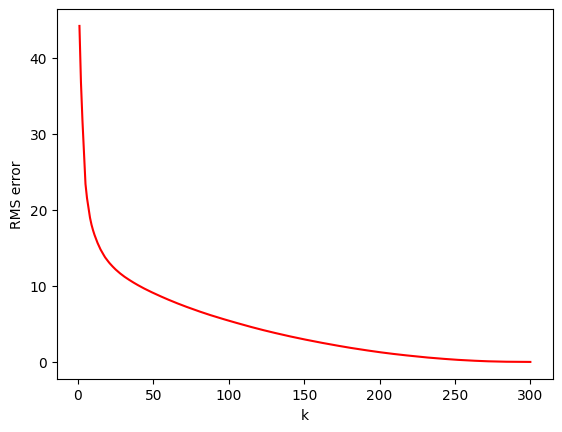

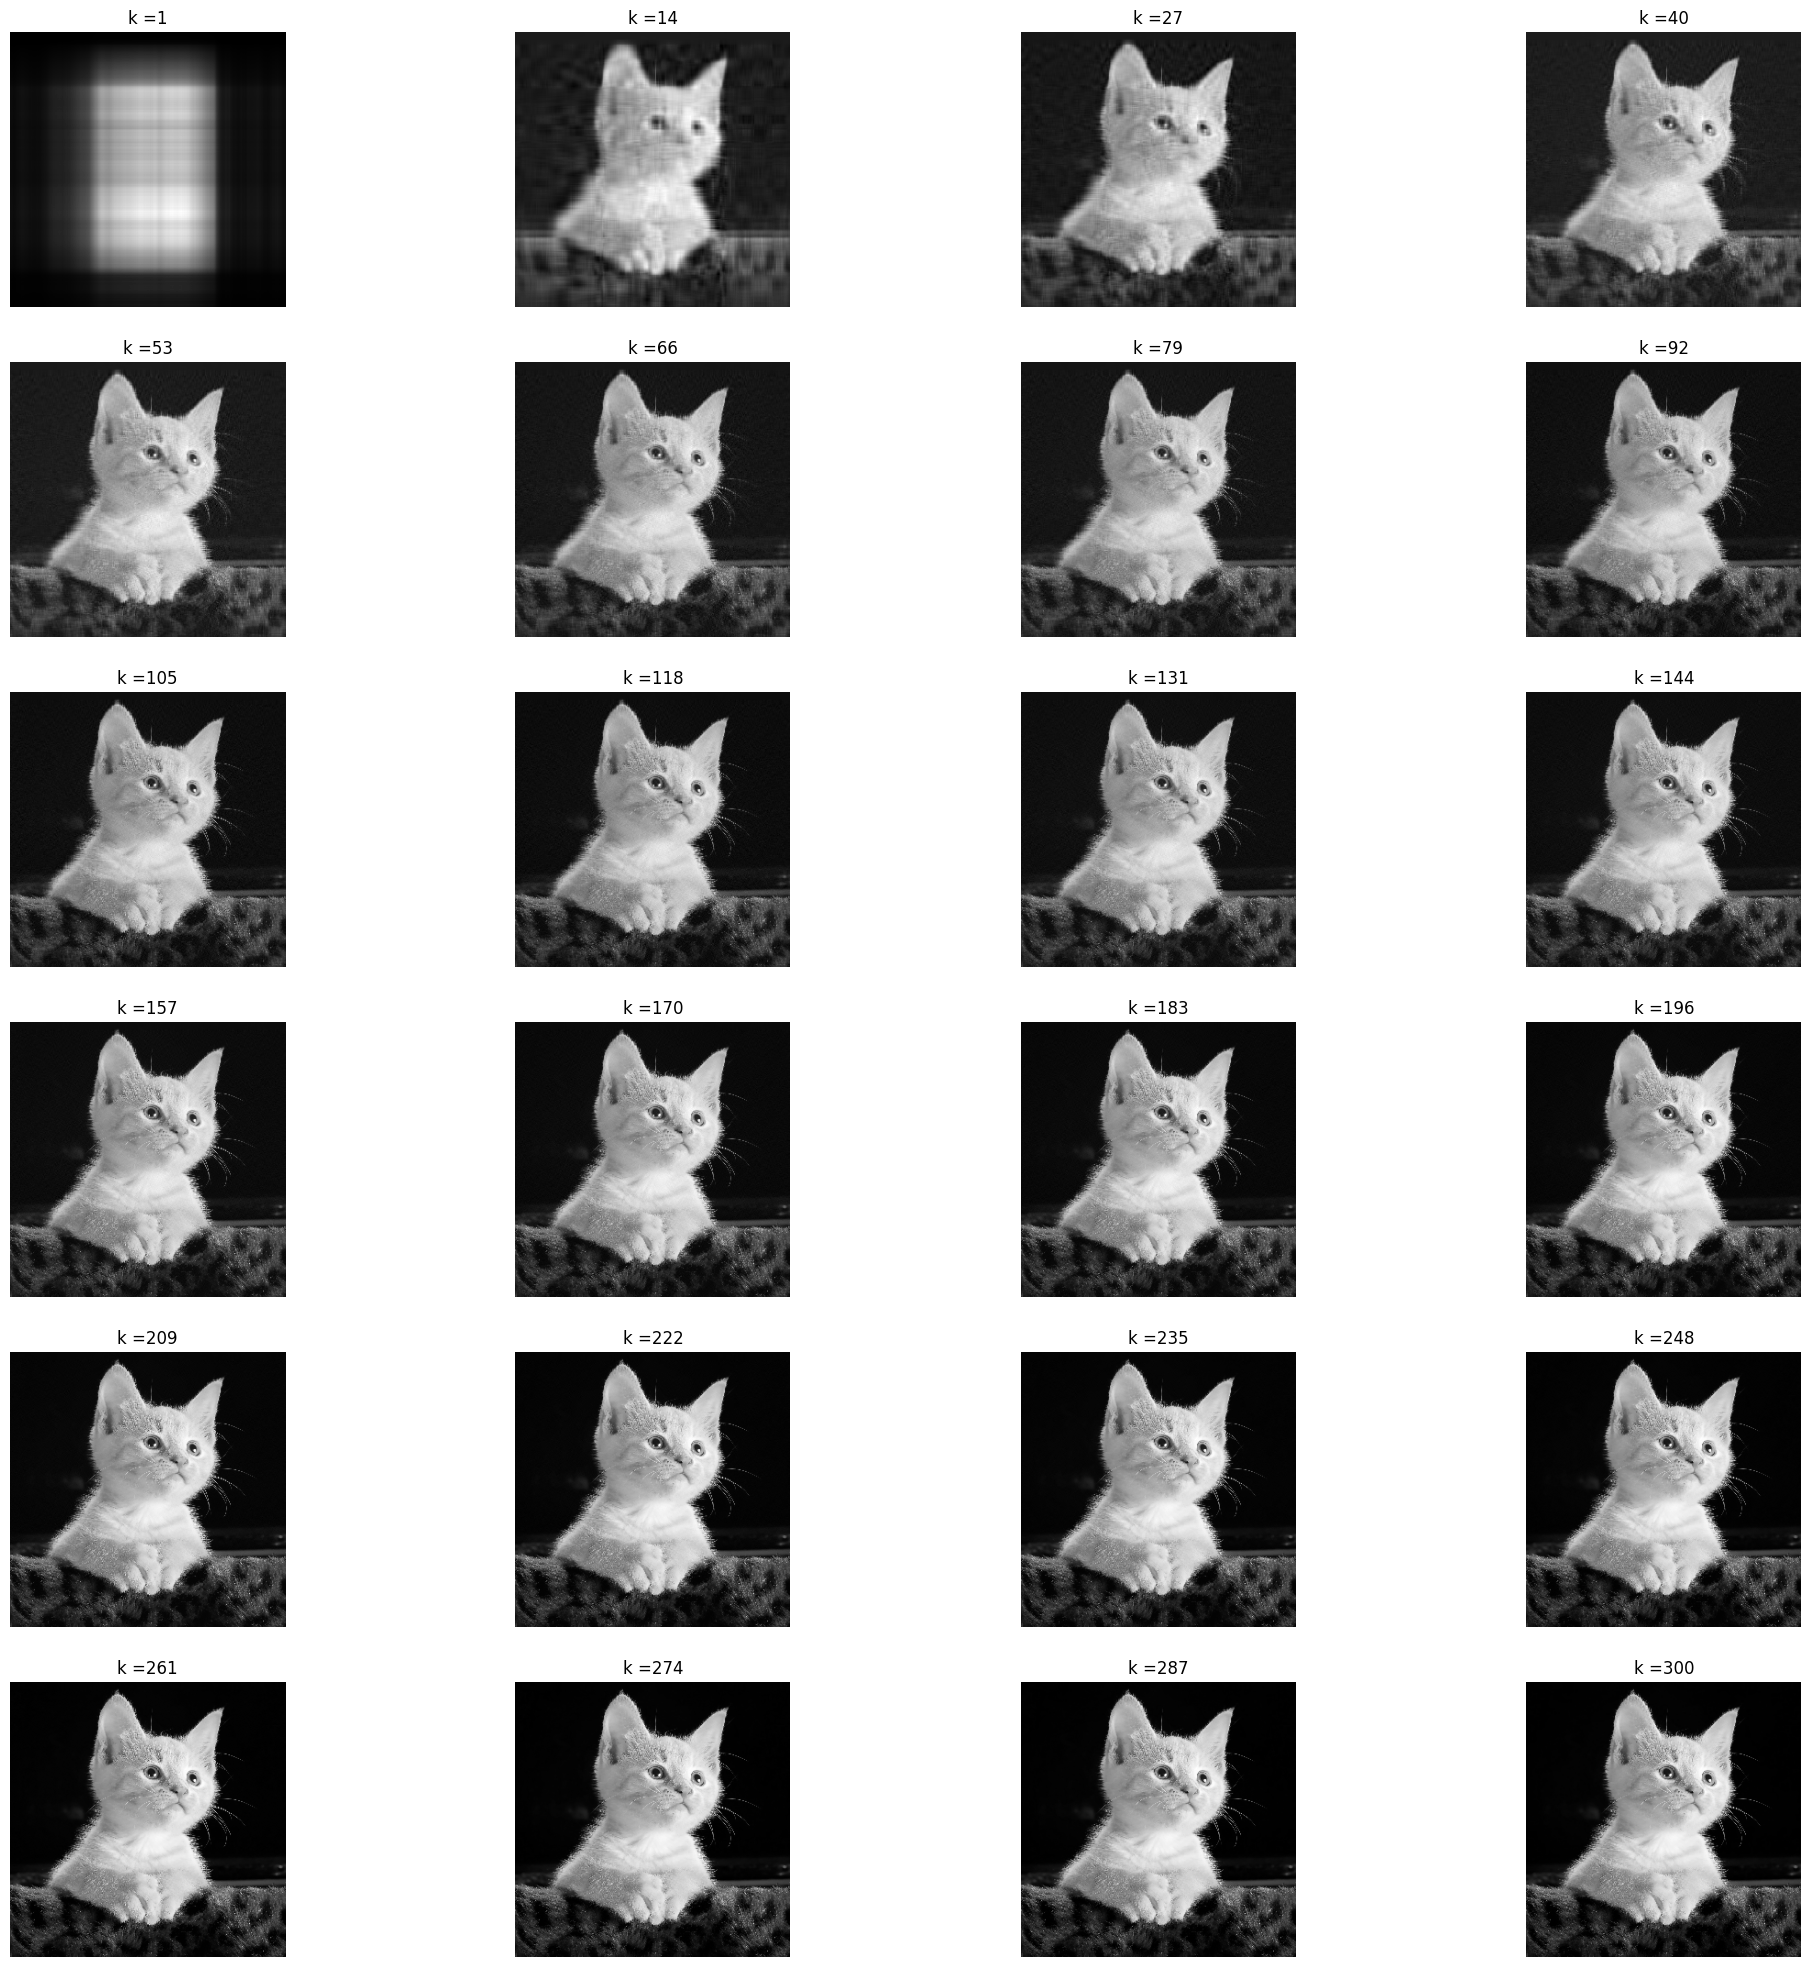

In [24]:
def main_application():
  color_image = cv2.imread("/content/cat.jpeg")
  color_image = cv2.resize(color_image, (300,300))
  ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
  gray_image = convertColorToGrayScale(color_image, ratio_for_grayscale)
  metric_list, approx_list, k = evaluate_svd_for_feature_compression_by_metric(gray_image, 1)
  print(len(approx_list))
  draw_metric_information(metric_list, k)
  draw_approx_image(approx_list, k)

main_application()

### Question 5

In [25]:
#Question 5
color_image = cv2.imread("/content/cat.jpeg")
color_image = cv2.resize(color_image, (300,300))
ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
gray_image = convertColorToGrayScale(color_image, ratio_for_grayscale)
_, _, k  = evaluate_svd_for_feature_compression_by_metric(gray_image,0)
print(k)

300


In [ ]:

# Load the image
img = cv2.imread('/content/cat.jpeg', 0)

color_image = cv2.imread("/content/cat.jpeg")
color_image = cv2.resize(color_image, (300,300))
ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
img = convertColorToGrayScale(color_image, ratio_for_grayscale)

noisy_img = addNoiseToImage(img)
# # Generate random Gaussian noise
# mean = 0
# stddev = 25
# noise = np.zeros(img.shape, np.uint8)
# cv2.randn(noise, mean, stddev)

# # Add noise to image
# noisy_img = cv2.add(img, noise)

# Save noisy image
cv2.imwrite('noisy_img.jpg', noisy_img)

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sys

gt = cv2.imread('/content/cat.jepg', 0)

img = cv2.imread('noisy_img.jpg', 0)# Load the image

# Calculate U (u), Σ (s) and V (vh)
u, s, vh = np.linalg.svd(img)
print(u.shape)
print(s.shape)
# Remove sigma values below threshold (250)
error_list = []
best_i = -1
best_error = sys.maxsize
for i in range(1, 1000):
  s_cleaned = np.where(s > i, s, 0)
  # img_denoised = np.array(np.dot(u * s_cleaned, vh), dtype=int)

  img_denoised = np.array( np.dot(u[:, :612] * s_cleaned, vh))

  error = np.sqrt(np.sum((gt - img_denoised)**2))
  if (best_error > error):
    best_error = error
    best_i = i
  error_list.append(error)

s_cleaned = np.where(s > best_i, s, 0)
# img_denoised = np.array(np.dot(u * s_cleaned, vh), dtype=int)
img_denoised = np.array( np.dot(u[:, :612] * s_cleaned, vh))

cv2.imwrite("result.png", img_denoised)

  # print("i= ", i, "; ", error)
# Calculate A' = U * Σ (cleaned) * V
# print(u.shape)
# print(s.shape)
# print(vh.shape)

# img_denoised = np.array(np.dot(u * s_cleaned, vh), dtype=int)

# errror = np.sqrt(np.sum((gt - img_denoised)**2))
# print(errror)
# cv2.imwrite("result.png", img_denoised)
# # Save the new image
# misc.imsave('morocco_denoised.jpg', img_denoised)

plt.plot(error_list)
plt.xlabel("Threshod")
plt.ylabel("RMSE")
plt.show()

In [ ]:
print(np.where(s > 250, s, 0))


In [30]:
# Add Gaussian noise to input image
def addNoiseToImage(image, mean = 0, stddev= 25):

  #uncomment the following three lines of codes for another project
  """noise = np.random.normal(mean, stddev, image.shape)
  noise = np.where(noise > 0 , np.around(noise), 0)
  noise = noise.astype(np.uint8)
  np.save("noise.npy", noise)"""

  noise = np.load("noise.npy")
  # Add noise to image
  noisy_img = cv2.add(image, noise)

  return noisy_img

#### Question 7


In [33]:
from google.colab.patches import cv2_imshow
color_image = cv2.imread("/content/cat.jpeg")
color_image = cv2.resize(color_image, (300,300))
ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
gray_image = convertColorToGrayScale(color_image, ratio_for_grayscale)

noise_image = addNoiseToImage(gray_image)
avg_org = np.sum(gray_image)/(gray_image.shape[0]*gray_image.shape[1])
avg_noise = np.sum(noise_image)/(gray_image.shape[0]*gray_image.shape[1])

print("avg_org: ", round(avg_org,2))
print("avg_noise: ", round(avg_noise,2))



avg_org:  66.84
avg_noise:  76.73


In [34]:
def perform_image_denoise(noise_image, sigma_threshold):

  # Calculate U (u), Σ (s) and V (vh)
  u, s, vh = np.linalg.svd(noise_image)

  # Remove sigma values below sigma_threshold
  s_cleaned = np.where(s > sigma_threshold, s, 0)

  img_denoised = np.array(np.dot(u * s_cleaned, vh), dtype=int)

  return img_denoised


In [35]:
def find_best_sigma_image_denoise(noise_image, orignial_image, metric = 0, sigma_range = 1000):

  # Calculate U (u), Σ (s) and V (vh)
  u, s, vh = np.linalg.svd(noise_image)

  # Select the best threshold that has mininum RMS error
  evaluation_history = []
  for i in range(1, sigma_range):
    s_cleaned = np.where(s > i, s, 0)

    img_denoised = np.array(np.dot(u * s_cleaned, vh), dtype=int)

    if (metric == 0):
      similarity = compute_cosine_similarity(orignial_image, img_denoised)
      evaluation_history.append(similarity)
    else:
      error = compute_rms_error(orignial_image, img_denoised)
      evaluation_history.append(error)

  if metric == 0:
    best_index = evaluation_history.index(max(evaluation_history))
  else:
    best_index = evaluation_history.index(min(evaluation_history))

  return best_index, evaluation_history


In [44]:
def main_application():
  #Read an colori mage
  color_image = cv2.imread("/content/cat.jpeg")

  #Resize an image to (300,300)
  color_image = cv2.resize(color_image, (300,300))

  #Convert image to grayscale
  ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
  gray_image = convertColorToGrayScale(color_image, ratio_for_grayscale)

  #Save resized grayscale image to file gray_image.png
  cv2.imwrite("gray_image.png", gray_image)

  # Add Gaussian noise to gray image
  noise_gray_image = addNoiseToImage(gray_image, 0, 25)

  #Save noisy grayscale image to file noise_gray_image.png
  cv2.imwrite("noise_gray_image.png", noise_gray_image)

  metric = 1 # for cosine similarity
  best_threshold, evaluation_history = find_best_sigma_image_denoise(noise_gray_image, gray_image, metric)
  denoise_image = perform_image_denoise(noise_gray_image, best_threshold)

  cv2.imwrite("denoise_image.png", denoise_image)

  plt.plot(evaluation_history)
  plt.xlabel("Threshod")
  plt.ylabel("Cosine Similarity")
  plt.show()

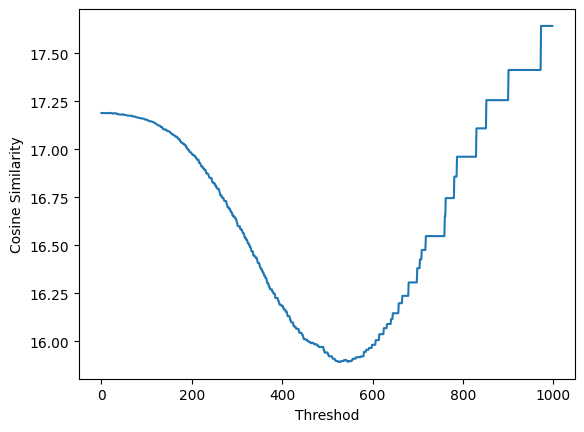

In [45]:
main_application()

In [42]:
def main_application():
  #Read an colori mage
  color_image = cv2.imread("/content/cat.jpeg")

  #Resize an image to (300,300)
  color_image = cv2.resize(color_image, (300,300))

  #Convert image to grayscale
  ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
  gray_image = convertColorToGrayScale(color_image, ratio_for_grayscale)

  #Save resized grayscale image to file gray_image.png
  cv2.imwrite("gray_image.png", gray_image)

  # Add Gaussian noise to gray image
  noise_gray_image = addNoiseToImage(gray_image, 0, 25)

  #Save noisy grayscale image to file noise_gray_image.png
  cv2.imwrite("noise_gray_image.png", noise_gray_image)


  #Perform image denois
  sigma_threshold = 200
  denoise_image = perform_image_denoise(noise_gray_image, sigma_threshold)

  cv2.imwrite("denoise_image.png", denoise_image)

In [43]:
main_application()

#### Question *8*

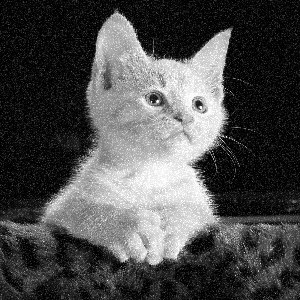

similarity 16.98


In [47]:
#Read an colori mage
color_image = cv2.imread("/content/cat.jpeg")
color_image = cv2.resize(color_image, (300,300))
ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
gray_image = convertColorToGrayScale(color_image, ratio_for_grayscale)
noise_gray_image = addNoiseToImage(gray_image, 0, 25)

#Perform image denois
sigma_threshold = 200
denoise_image = perform_image_denoise(noise_gray_image, sigma_threshold)
cv2_imshow(denoise_image)
similarity = compute_rms_error(denoise_image,gray_image)
print("similarity",  round(similarity,2))

#### Question *9*

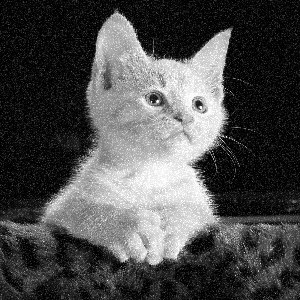

similarity 0.9898


In [48]:
#Read an colori mage
color_image = cv2.imread("/content/cat.jpeg")
color_image = cv2.resize(color_image, (300,300))
ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
gray_image = convertColorToGrayScale(color_image, ratio_for_grayscale)
noise_gray_image = addNoiseToImage(gray_image, 0, 25)

#Perform image denois
sigma_threshold = 200
denoise_image = perform_image_denoise(noise_gray_image, sigma_threshold)
cv2_imshow(denoise_image)
similarity = compute_cosine_similarity(denoise_image,gray_image)
print("similarity",  round(similarity,4))

### Question 10

In [51]:
def find_best_sigma_based_cosine():
  #Read an colori mage
  color_image = cv2.imread("/content/cat.jpeg")

  #Resize an image to (300,300)
  color_image = cv2.resize(color_image, (300,300))

  #Convert image to grayscale
  ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
  gray_image = convertColorToGrayScale(color_image, ratio_for_grayscale)

  #Save resized grayscale image to file gray_image.png
  cv2.imwrite("gray_image.png", gray_image)

  # Add Gaussian noise to gray image
  noise_gray_image = addNoiseToImage(gray_image, 0, 25)

  #Save noisy grayscale image to file noise_gray_image.png
  cv2.imwrite("noise_gray_image.png", noise_gray_image)

  metric = 1 # for RMSE
  best_threshold, evaluation_history = find_best_sigma_image_denoise(noise_gray_image, gray_image, metric)
  print("best sigma: ", best_threshold)

find_best_sigma_based_cosine()

best sigma:  525


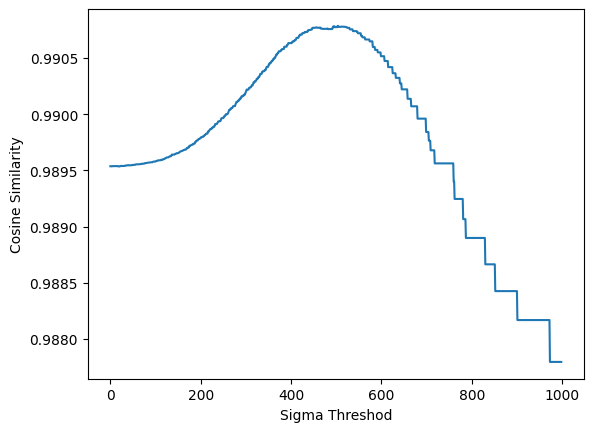

In [52]:
def plot_chart_based_cosine():
  #Read an colori mage
  color_image = cv2.imread("/content/cat.jpeg")

  #Resize an image to (300,300)
  color_image = cv2.resize(color_image, (300,300))

  #Convert image to grayscale
  ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
  gray_image = convertColorToGrayScale(color_image, ratio_for_grayscale)

  #Save resized grayscale image to file gray_image.png
  cv2.imwrite("gray_image.png", gray_image)

  # Add Gaussian noise to gray image
  noise_gray_image = addNoiseToImage(gray_image, 0, 25)

  #Save noisy grayscale image to file noise_gray_image.png
  cv2.imwrite("noise_gray_image.png", noise_gray_image)

  metric = 0 # for cosine similarity
  best_threshold, evaluation_history = find_best_sigma_image_denoise(noise_gray_image, gray_image, metric)

  plt.plot(evaluation_history)
  plt.xlabel("Sigma Threshod")
  plt.ylabel("Cosine Similarity")
  plt.show()

plot_chart_based_cosine()

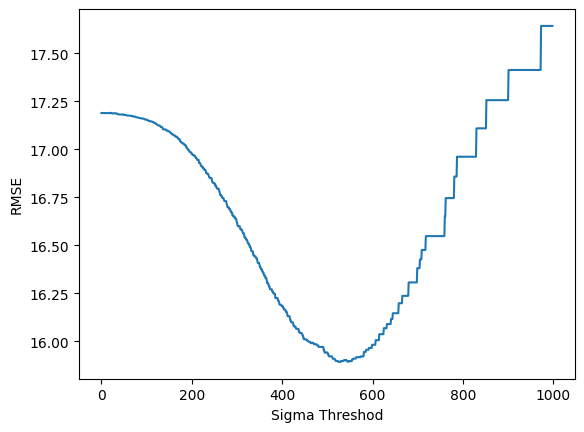

In [53]:
def plot_chart_based_rmse():
  #Read an colori mage
  color_image = cv2.imread("/content/cat.jpeg")

  #Resize an image to (300,300)
  color_image = cv2.resize(color_image, (300,300))

  #Convert image to grayscale
  ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
  gray_image = convertColorToGrayScale(color_image, ratio_for_grayscale)

  #Save resized grayscale image to file gray_image.png
  cv2.imwrite("gray_image.png", gray_image)

  # Add Gaussian noise to gray image
  noise_gray_image = addNoiseToImage(gray_image, 0, 25)

  #Save noisy grayscale image to file noise_gray_image.png
  cv2.imwrite("noise_gray_image.png", noise_gray_image)

  metric = 1 # for cosine similarity
  best_threshold, evaluation_history = find_best_sigma_image_denoise(noise_gray_image, gray_image, metric)

  plt.plot(evaluation_history)
  plt.xlabel("Sigma Threshod")
  plt.ylabel("RMSE")
  plt.show()

plot_chart_based_rmse()